<h1 style="text-align: center;">Regresi Non Linear</h1>
<table>
<tbody>
<tr>
<td style="text-align: left;">Penulis</td>
<td style="text-align: left;">:</td>
<td style="text-align: left;">Moch Rizky Wijaya</td>
</tr>
<td style="text-align: left;">Fungsi Non Linear yang dipakai</td>
<td style="text-align: left;">:</td>
<td style="text-align: left;">Fungsi Sigmoidal/Logistic</td>
</tbody>
</table>
<p>&nbsp;</p>

In [0]:
xdata = [0.,         0.08163265, 0.16326531, 0.24489796, 0.32653061, 0.40816327,
 0.48979592, 0.57142857, 0.65306122, 0.73469388, 0.81632653, 0.89795918,
 0.97959184, 1.06122449, 1.14285714, 1.2244898,  1.30612245, 1.3877551,
 1.46938776, 1.55102041, 1.63265306, 1.71428571, 1.79591837, 1.87755102,
 1.95918367, 2.04081633, 2.12244898, 2.20408163, 2.28571429, 2.36734694,
 2.44897959, 2.53061224, 2.6122449,  2.69387755, 2.7755102,  2.85714286,
 2.93877551, 3.02040816, 3.10204082, 3.18367347, 3.26530612, 3.34693878,
 3.42857143, 3.51020408, 3.59183673, 3.67346939, 3.75510204, 3.83673469,
 3.91836735, 4.        ]
ydata = [2.86253211, 2.58408736, 2.85238869, 2.20328028, 2.35505211, 2.15580098,
 1.62385977, 1.51773747, 1.58460558, 1.56780331, 1.38926991, 1.23309392,
 0.88831179, 1.14039132, 1.09814583, 0.58195014, 0.97957583, 1.00016637,
 0.94937867, 0.88281865, 1.05904456, 0.51311865, 0.54700714, 0.66390699,
 0.47465497, 0.65048962, 0.53479316, 0.44458898, 0.05609672, 0.45631037,
 0.54242354, 0.93328116, 0.45668558, 0.57625432, 0.79441476, 0.58926037,
 0.97314073, 0.29536801, 0.39975342, 0.53597812, 0.49927828, 0.30842097,
 0.38933359, 0.9474868,  0.5229339,  0.60288646, 0.5756889,  0.1270815,
 0.59254164, 0.55991963]

In [0]:
#tulis library yang dibutuhkan
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import pandas as pd
from scipy.optimize import curve_fit
np.random.seed(100)

In [0]:
df = {'x' : xdata, 'y' : ydata}
data = pd.DataFrame(df)
data.head()

,x,y
0,0.000000,2.862532
1,0.081633,2.584087
2,0.163265,2.852389
3,0.244898,2.203280
4,0.326531,2.355052


### Sigmoidal/Logistic
$$ Y = a + \frac{b}{1+ c^{(X-d)}}$$

In [0]:
#tuliskan function yang dibutuhkan
def sigmoidal(x, a, b, c, d):
  y = a + b/(1+c**(x-d))
  return y

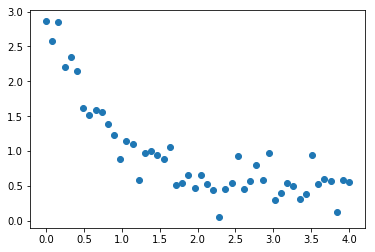

In [0]:
#plot data xdata dengan ydata
plt.scatter(xdata, ydata)
plt.show()

In [0]:
#bagi data set anda menjadi training dan testing
msk = np.random.rand(len(data)) < 0.8

#Change list into array type
x_data = np.asarray(xdata)
y_data = np.asarray(ydata)

# # Lets normalize our data
nxdata =x_data/max(x_data)
nydata =y_data/max(y_data)

train_x = nxdata[msk]
test_x = nxdata[~msk]
train_y = nydata[msk]
test_y = nydata[~msk]

In [0]:
#lakukan training data dengan curve fit dan parameter func
# build the model using train set
popt, pcov = curve_fit(sigmoidal, train_x, train_y, maxfev=1000)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  


In [0]:
print(popt)

[ 1.87648742e+00 -1.70390350e+00  6.57507821e-04 -3.81909558e-04]


Mean absolute error: 0.06
Residual sum of squares (MSE): 0.0055193348
R2-score: 0.86


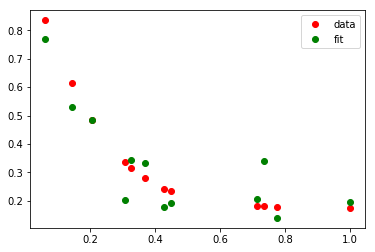

In [0]:
#lakukan testing data dan tampilkan diagram sebarnya (scatter diagram) serta hasil perhitungan MSE
# predict using test set
y_hat = sigmoidal(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.10f" % np.mean((y_hat - test_y) ** 2))

from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

plt.plot(test_x, y_hat, 'ro', label='data')
plt.plot(test_x,test_y, 'go', linewidth=3.0, label='fit')
plt.legend()

In [0]:
y_hat

array([0.83545268, 0.61443546, 0.48389863, 0.33567239, 0.3149133 ,
       0.28045199, 0.24307339, 0.23363397, 0.18159958, 0.18035312,
       0.17835167, 0.17370039])

Jelaskan mengapa ada memilih fungsi tersebut!

Pemilihan fungsi sigmoidal atau logistic karena fungsi tersebut memiliki parameter yang lebih banyak daripada fungsi yang lainnya pada contoh jupyter notebook **ML0101EN-Reg-NoneLinearRegression-py-v1.ipynb**. Sehingga hasil *fitting* lebih baik daripada fungsi yang lainnya.

$$ Y = a + \frac{b}{1+ c^{(X-d)}}$$

Fungsi tersebut mengandung parameter X sebagai variabel bebas, Y sebagai variabel tetap, serta a,b, c, dan d sebagai konstanta